# Characterization

## Setup

In [2]:
import sys
import math
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def load_data(dataset_name):
    # Read the data and create the dataframe.
    df = pd.DataFrame(pd.read_csv(dataset_name, encoding='utf-8', sep=","))

    # Convert the 'timestamp' column to date format.
    df['date'] = pd.to_datetime(df['date'], errors="raise")
    df['weekday'] = df['date'].dt.weekday
    
    df.drop('day', axis = 1, inplace = True)
    df.drop('isweekend', axis = 1, inplace = True)
    
    return df.sort_values('date')


In [2]:
df = load_data("data/Vancouver2017Full.csv")

In [3]:
df['datetime'] = df['date'] + pd.to_timedelta(df['hourofday'], unit='h')

In [4]:
df.head()

,date,weekday,hourofday,periodofday,weather,datetime
0,2017-01-01,6,12,4,3,2017-01-01 12:00:00
1001,2017-01-01,6,18,6,3,2017-01-01 18:00:00
1000,2017-01-01,6,18,6,3,2017-01-01 18:00:00
999,2017-01-01,6,18,6,3,2017-01-01 18:00:00
998,2017-01-01,6,18,6,3,2017-01-01 18:00:00


## Basic Info

In [5]:
# Total number of bookings.
len(df)

1055980

In [6]:
# Period covered by the data
max(df['date']) - min(df['date'])

Timedelta('364 days 00:00:00')

In [7]:
# Number of days for which there are bookings
len(df.groupby(['date']))

229

In [8]:
df['bookings_day'] = df.groupby('date')['date'].transform(len)
df['bookings_hour'] = df.groupby(['date', 'hourofday'])['date'].transform(len)
df.head()

,date,weekday,hourofday,periodofday,weather,datetime,bookings_day,bookings_hour
0,2017-01-01,6,12,4,3,2017-01-01 12:00:00,1493,123
1001,2017-01-01,6,18,6,3,2017-01-01 18:00:00,1493,150
1000,2017-01-01,6,18,6,3,2017-01-01 18:00:00,1493,150
999,2017-01-01,6,18,6,3,2017-01-01 18:00:00,1493,150
998,2017-01-01,6,18,6,3,2017-01-01 18:00:00,1493,150


## Number of Bookings in the Whole Period

In [9]:
df_bookings_whole_period = df.groupby(df["date"])['date'].count()
df_bookings_whole_period.head()

date
2017-01-01    1493
2017-01-02    2358
2017-01-03    3019
2017-01-04    3294
2017-01-05    3656
Name: date, dtype: int64

In [10]:
import matplotlib
font_params = {
            'font.size' : 24,
            'axes.labelsize': 24,
            'xtick.labelsize': 24,
            'ytick.labelsize': 24,
            'legend.fontsize': 24,
            'figure.dpi': 300,
            'figure.figsize': (15, 10)
            }

/Users/douglas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


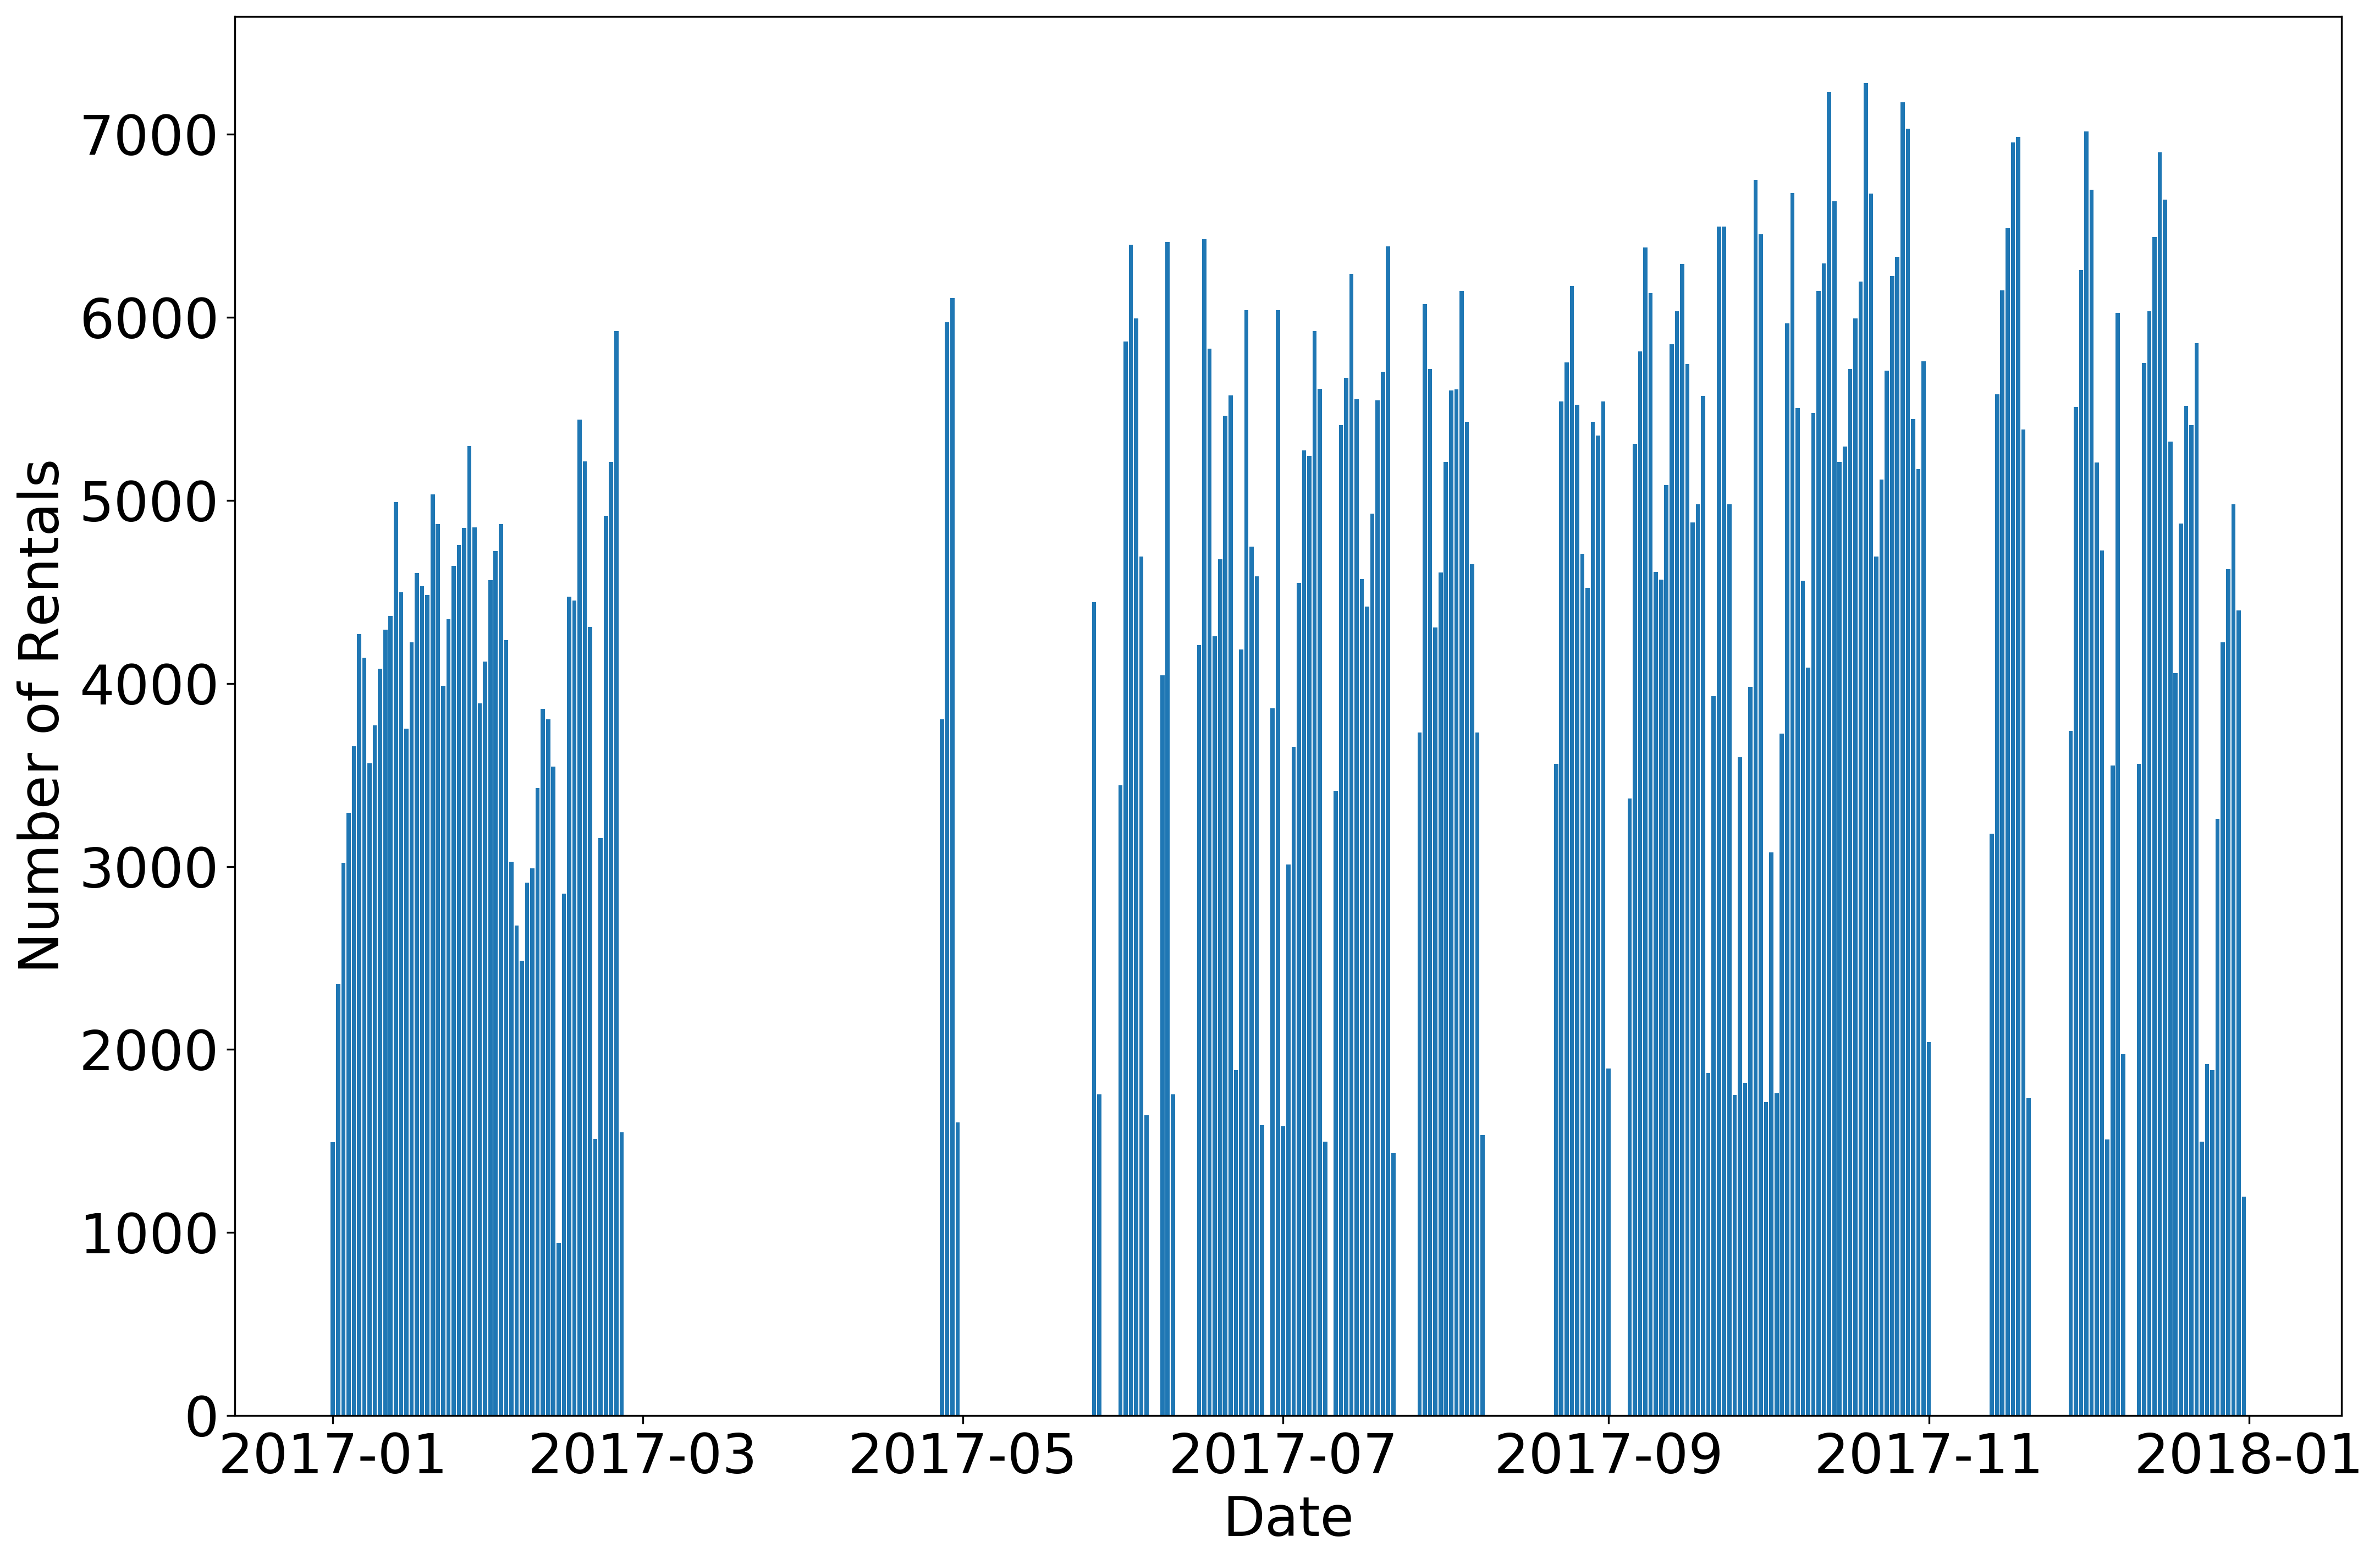

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

matplotlib.rcParams.update(font_params)

fig, ax = plt.subplots()
ax.bar(df_bookings_whole_period.index, df_bookings_whole_period.values)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Rentals')
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')

# Save chart.
plt.savefig('charts/BookingsWholePeriod.pdf')

plt.tight_layout()
plt.show()

In [12]:
start_date = '2017-09-01'
end_date = '2017-09-29'

mask = (df['date'] > start_date) & (df['date'] <= end_date)
df_bookings_analysis_period = df.loc[mask].groupby(['date'])['date'].count()
df_bookings_analysis_period.head()

date
2017-09-05    3371
2017-09-06    5310
2017-09-07    5813
2017-09-08    6382
2017-09-09    6132
Name: date, dtype: int64

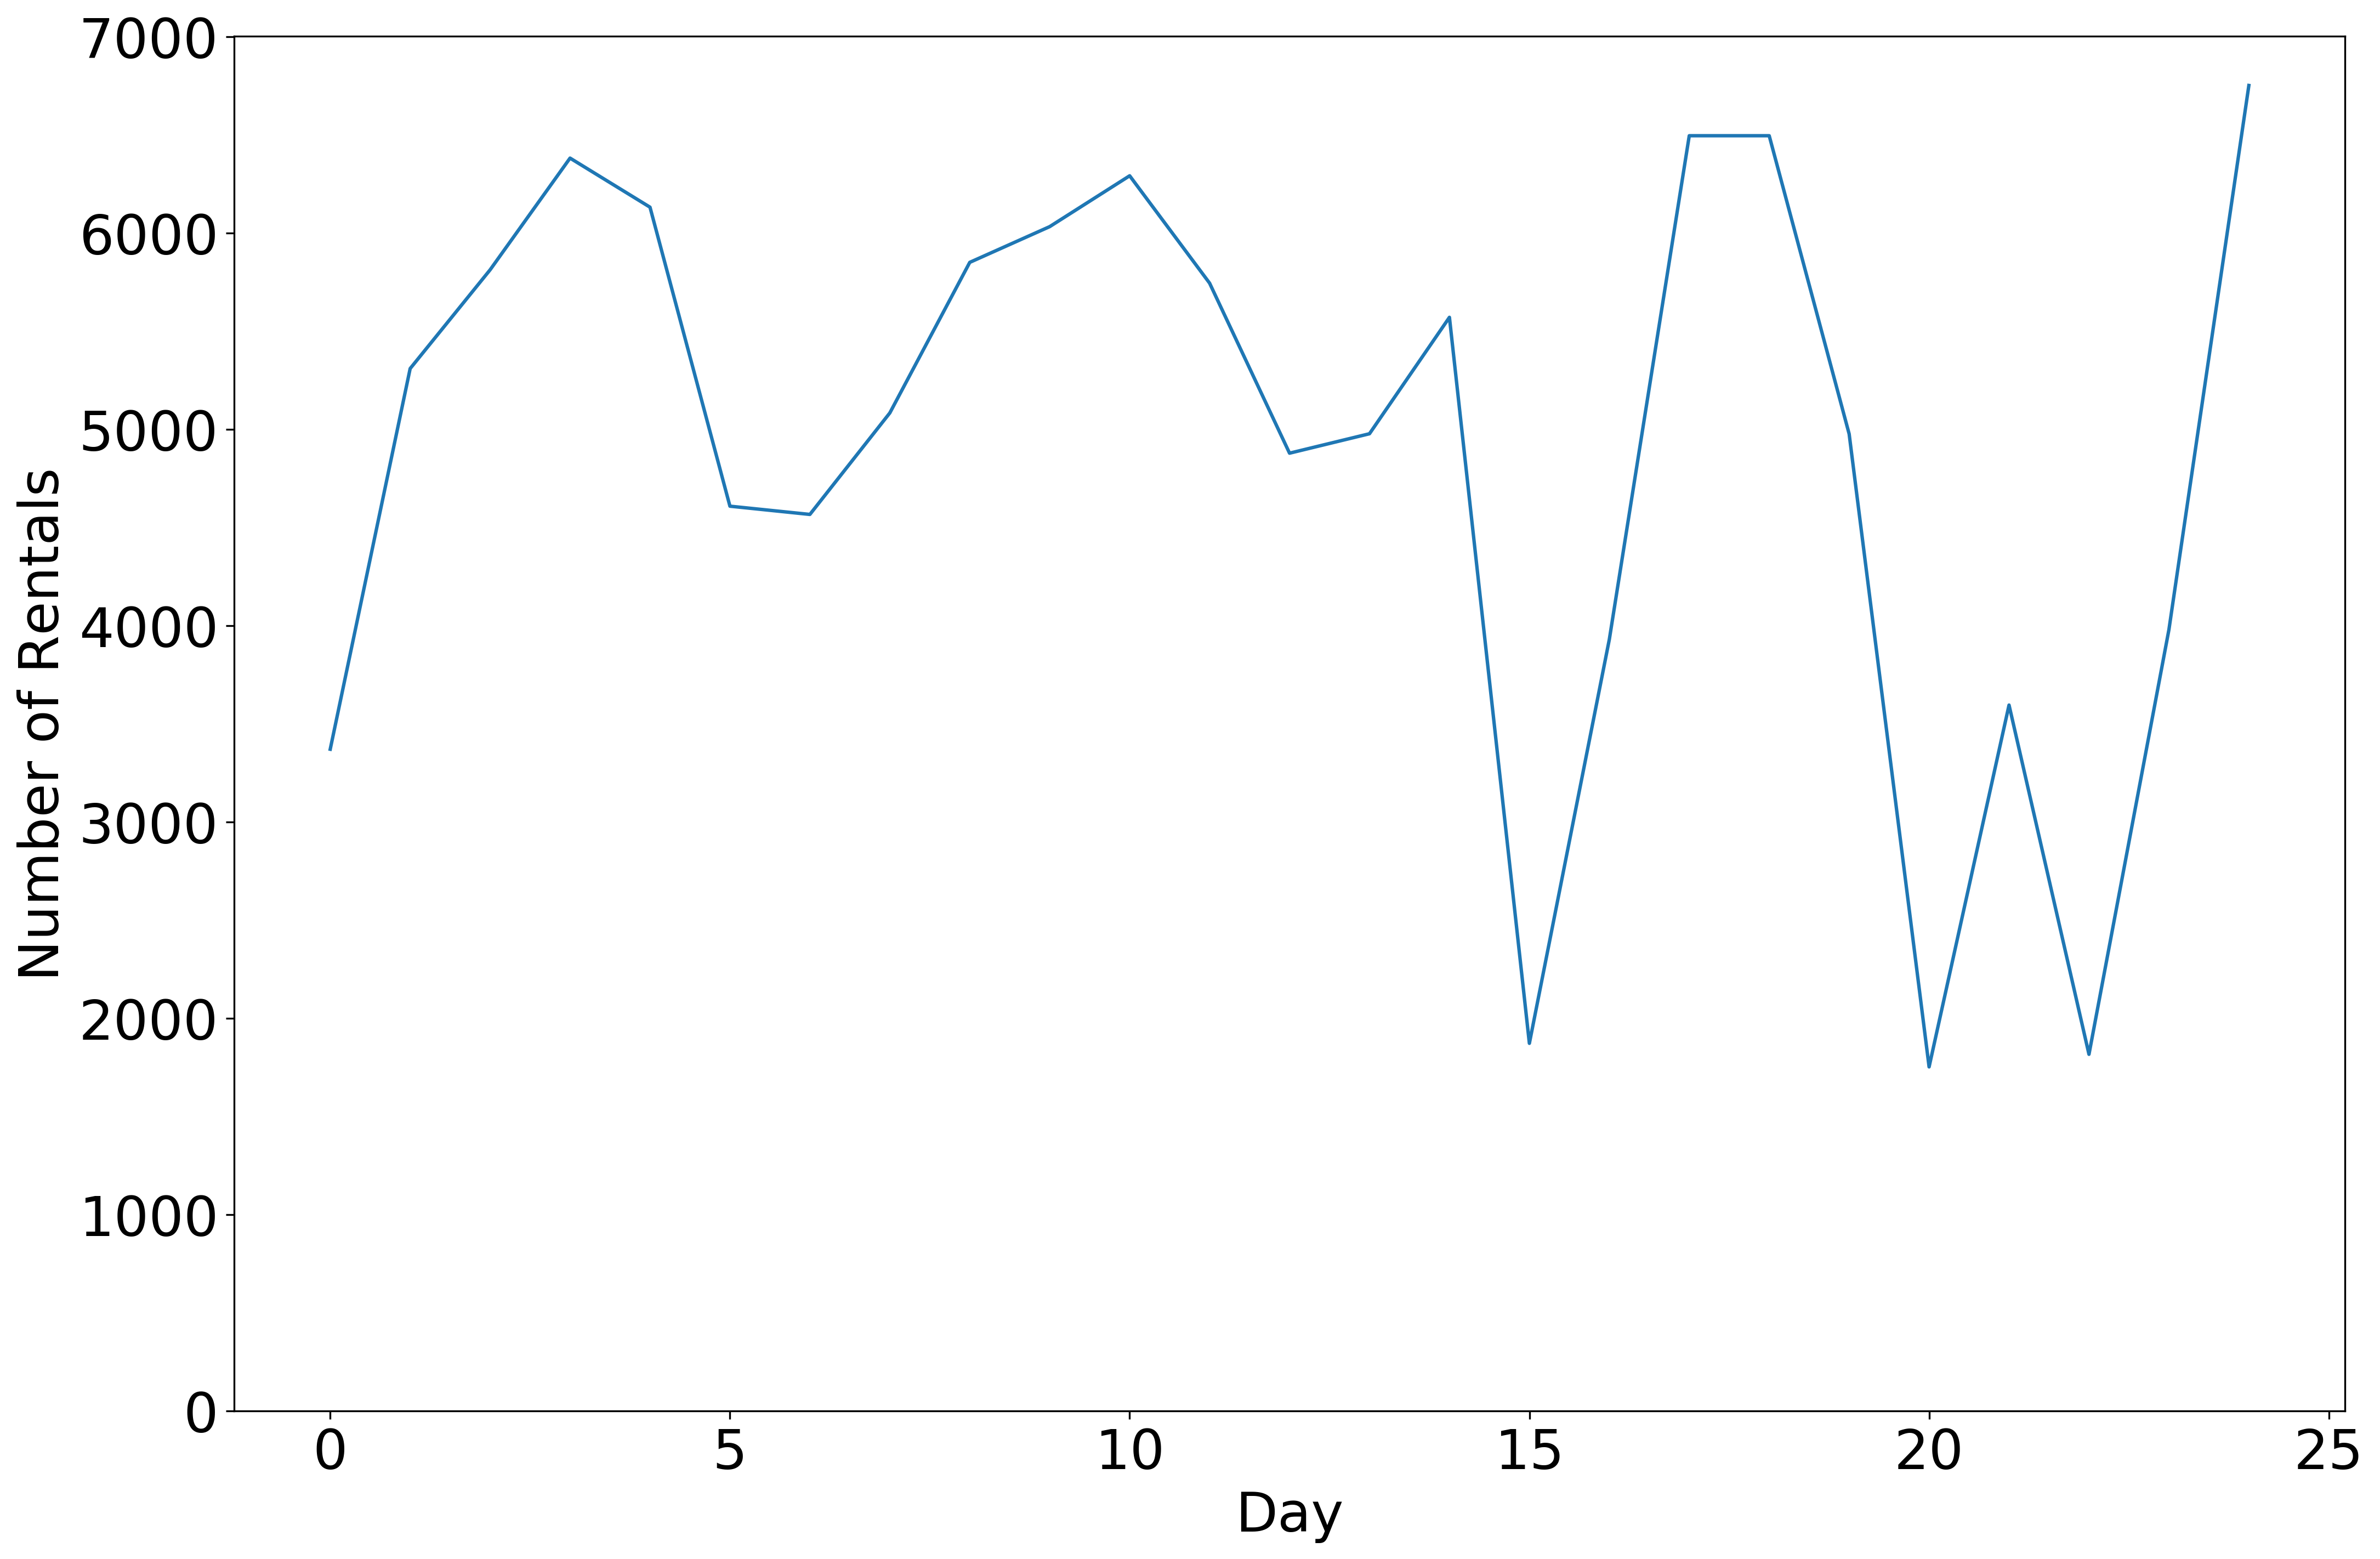

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

matplotlib.rcParams.update(font_params)

fig, ax = plt.subplots()
ax.plot(df_bookings_analysis_period.values)

ax.set_xlabel('Day')
ax.set_ylabel('Number of Rentals')
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
ax.set_ylim(bottom = 0)


# Save chart.
plt.savefig('charts/BookingsDayAnalysisPeriod.pdf')

plt.tight_layout()
plt.show()

In [14]:
start_date = '2017-09-01'
end_date = '2017-09-29'

mask = (df['date'] > start_date) & (df['date'] <= end_date)
df_bookings_analysis_period = df.loc[mask].groupby(['datetime'])['datetime'].count()
df_bookings_analysis_period.head()

datetime
2017-09-05 12:00:00    262
2017-09-05 13:00:00    223
2017-09-05 14:00:00    258
2017-09-05 15:00:00    296
2017-09-05 16:00:00    425
Name: datetime, dtype: int64

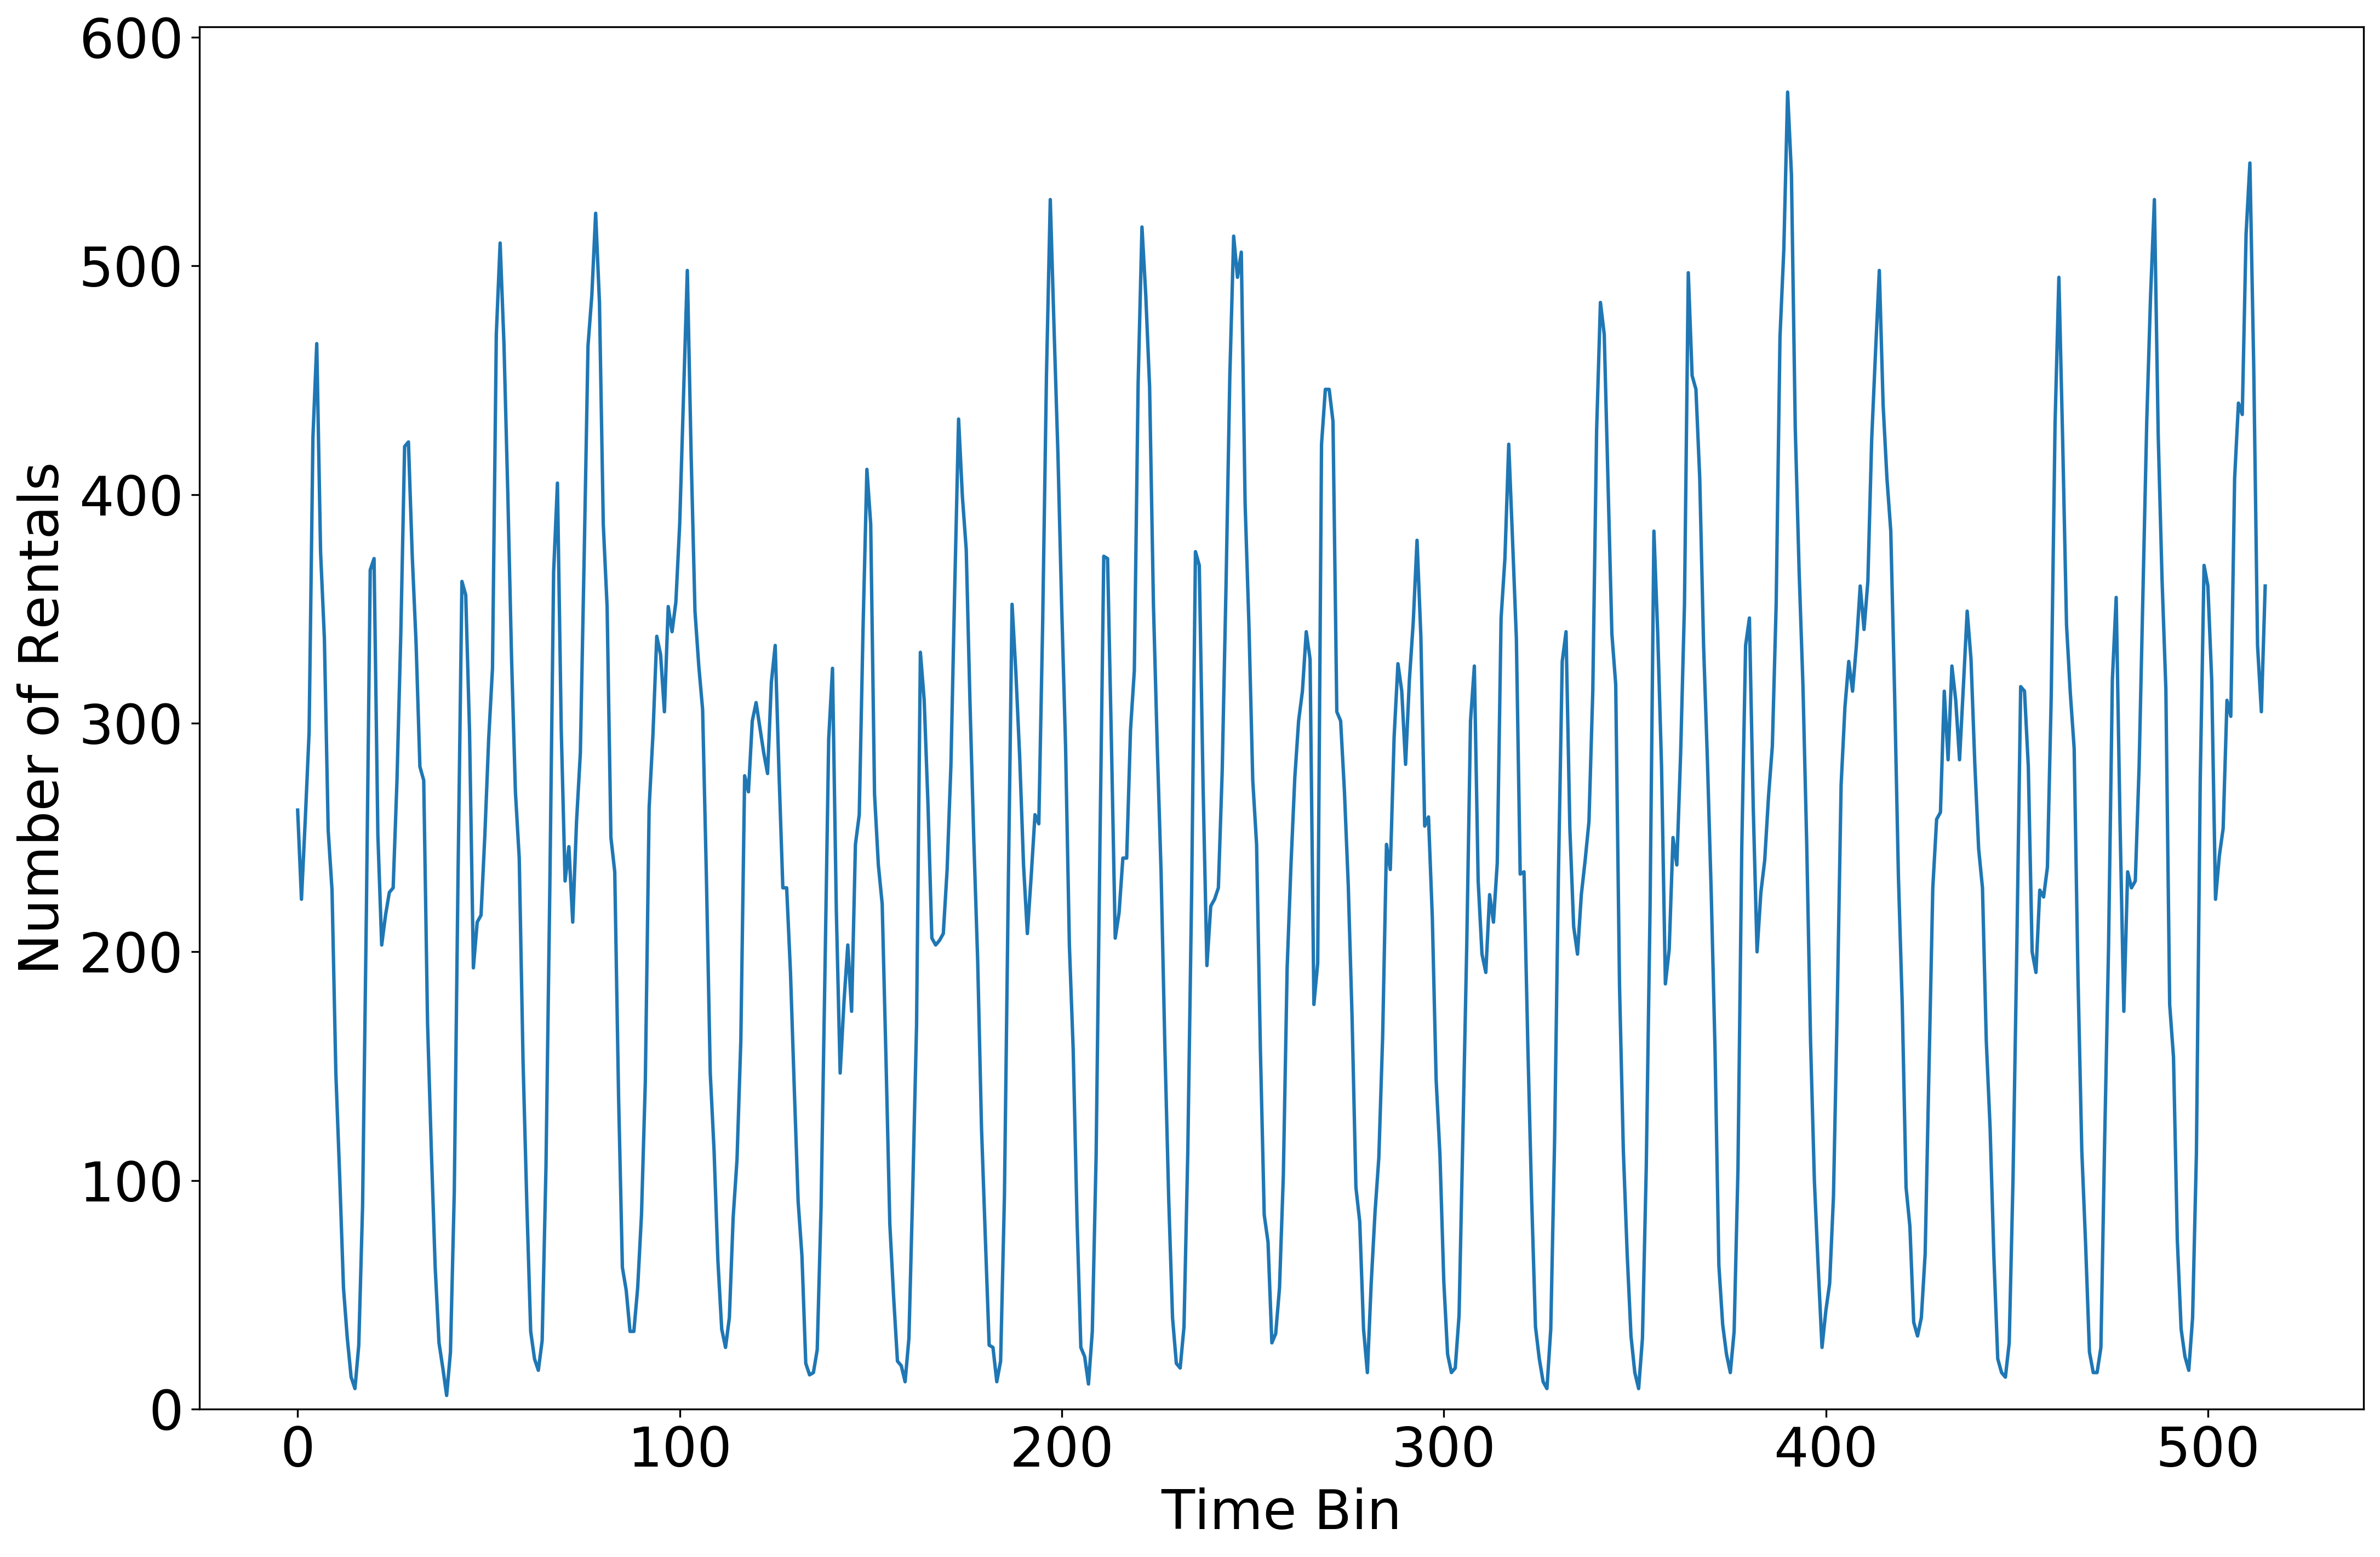

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

matplotlib.rcParams.update(font_params)

fig, ax = plt.subplots()
ax.plot(df_bookings_analysis_period.values)

ax.set_xlabel('Time Bin')
ax.set_ylabel('Number of Rentals')
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
ax.set_ylim(bottom = 0)


# Save chart.
plt.savefig('charts/BookingsHourAnalysisPeriod.pdf')

plt.tight_layout()
plt.show()

## Number of bookings per month

In [16]:
import calendar
df_bookings_month = df.groupby(df["date"].dt.month)['date'].count()
df_bookings_month

date
1     128592
2      92503
4      17483
5       9642
6     106165
7     120036
8      90005
9     130637
10    169868
11     60005
12    131044
Name: date, dtype: int64

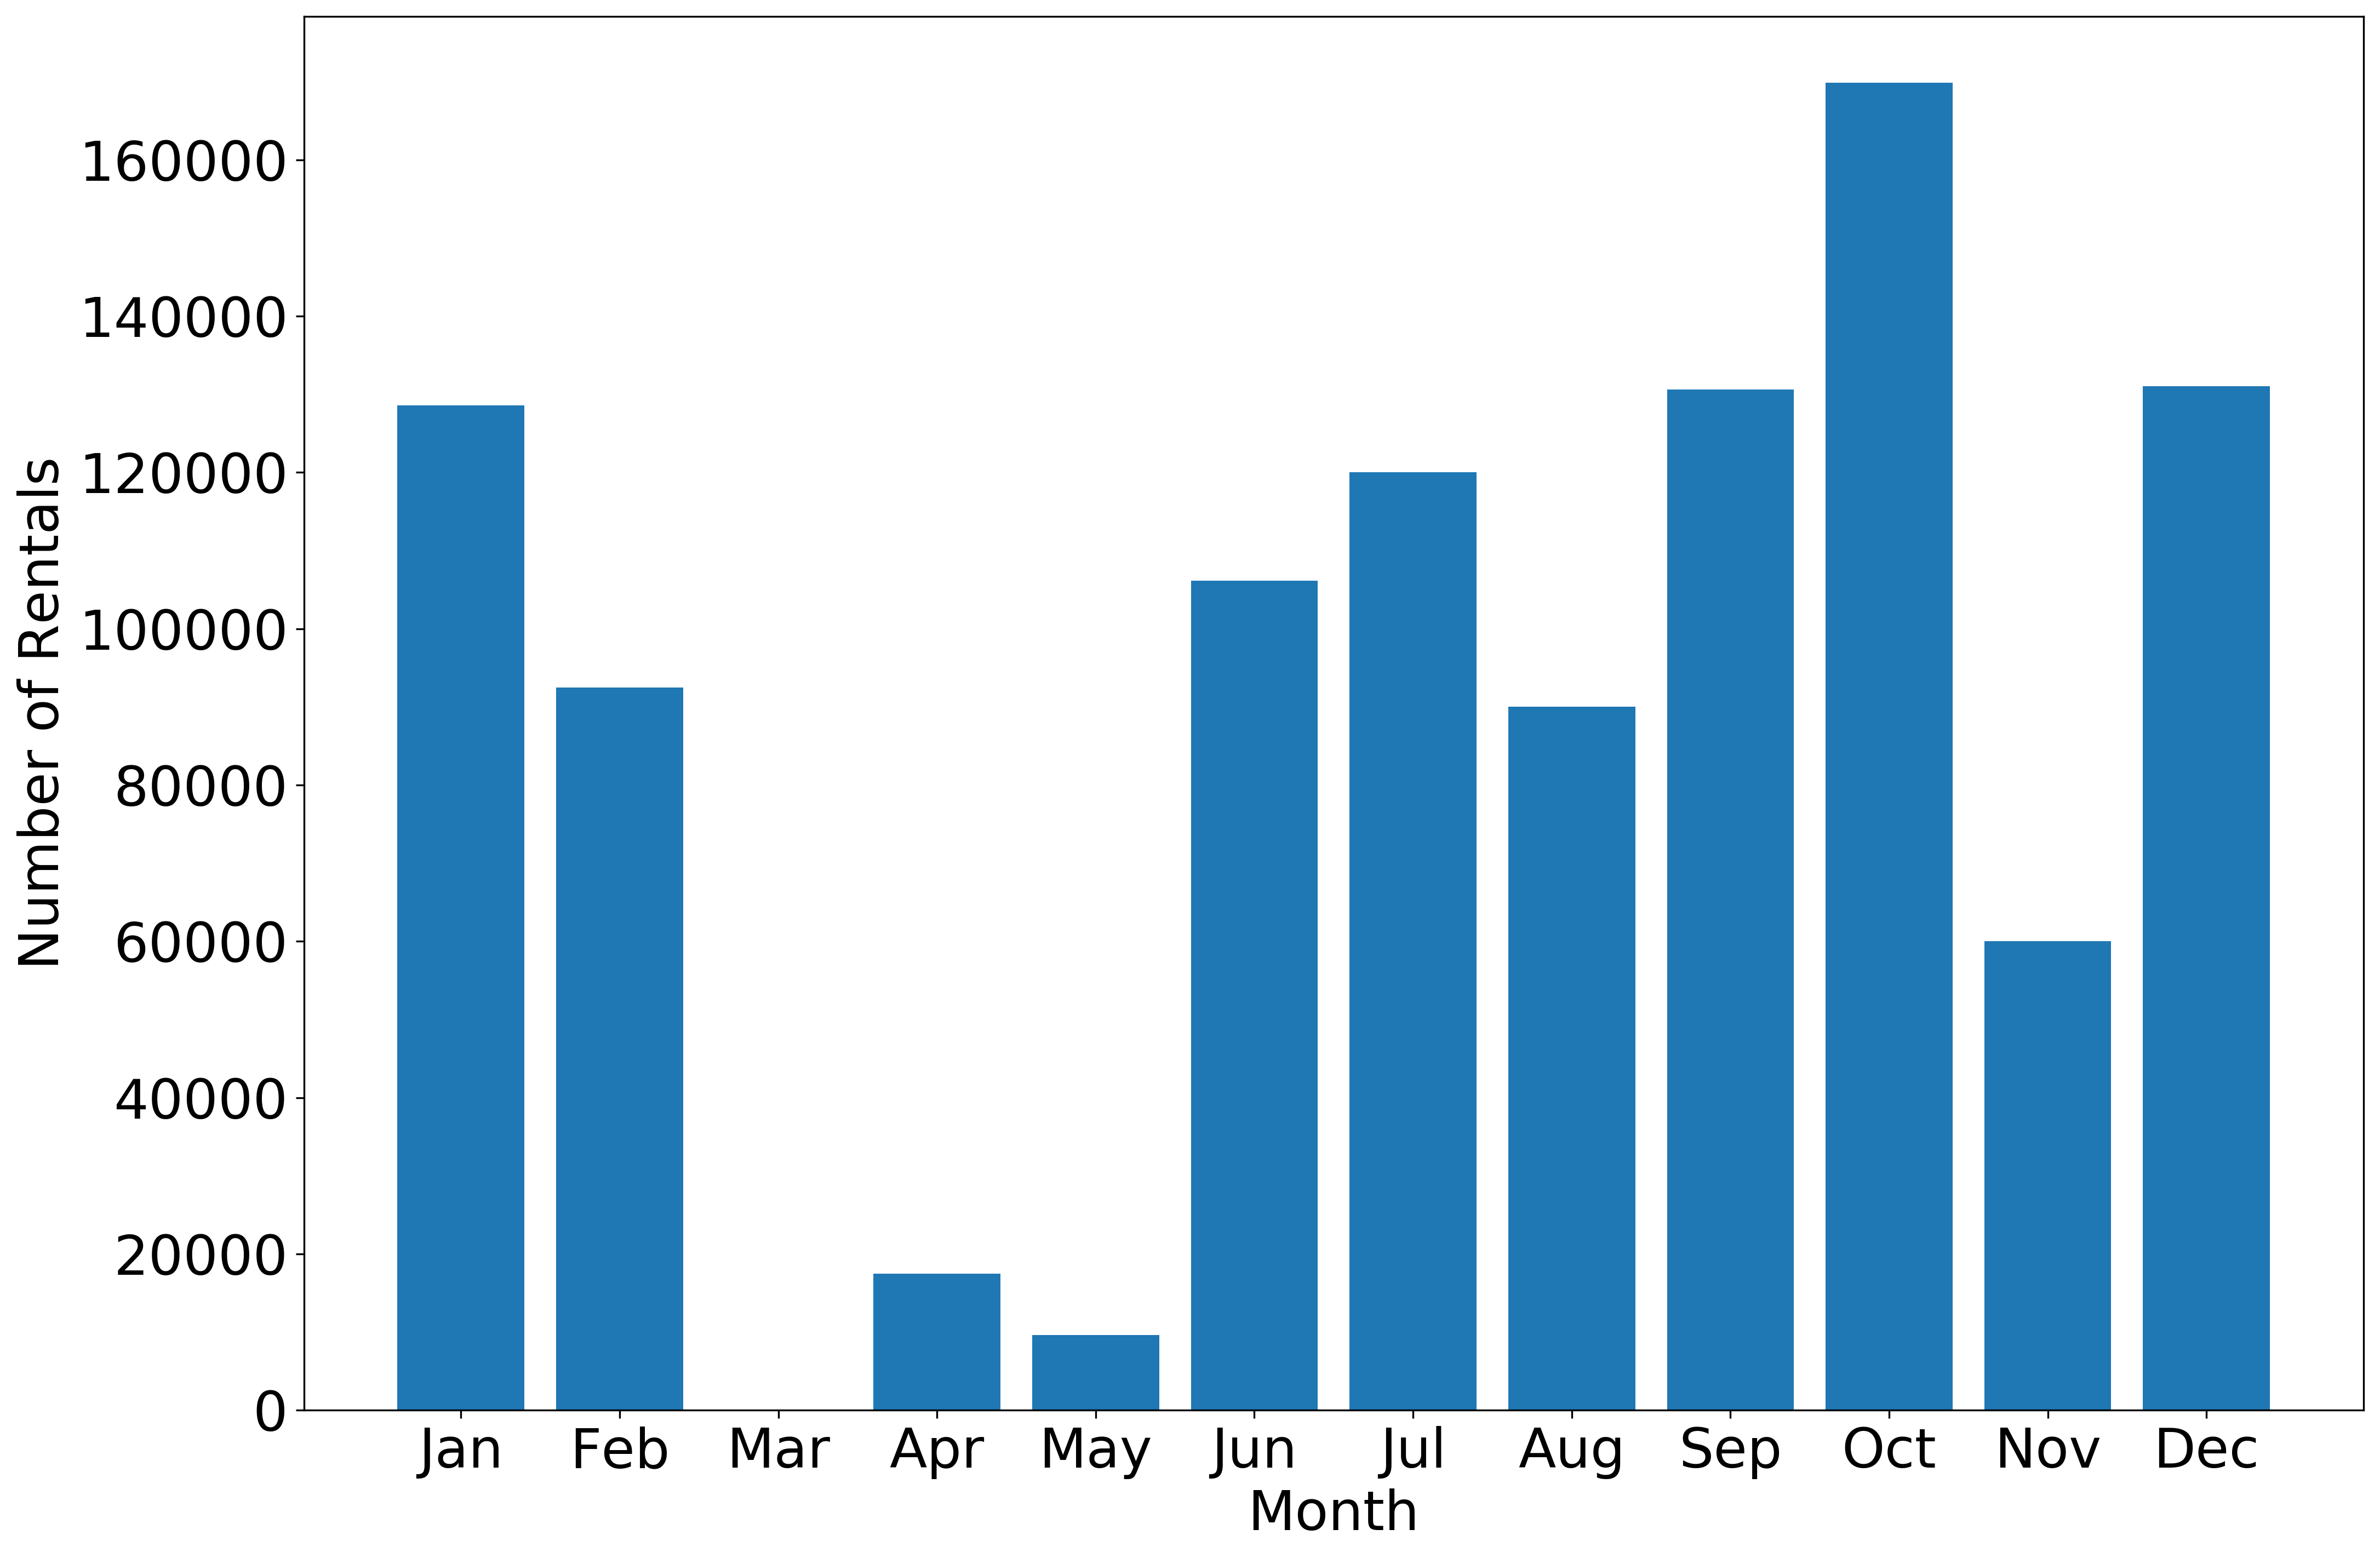

In [17]:
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams.update(font_params)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pos = [i + 1 for i, _ in enumerate(months)]

# the histogram of the data
fig, ax = plt.subplots()
ax.bar(df_bookings_month.index, df_bookings_month.values)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Rentals')
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
plt.xticks(pos, months)

# Save chart.
plt.savefig('charts/BookingsMonth.pdf')

plt.tight_layout()
plt.show()

## Average Number of Bookings per Weekday

In [18]:
weekly_data = [[] for _ in range(7)]
for name, group in df.groupby(pd.Grouper(key='date',freq='W')):
    if len(group) > 0:
        for n, g in group.groupby('weekday'):
            weekly_data[n].append(len(g))

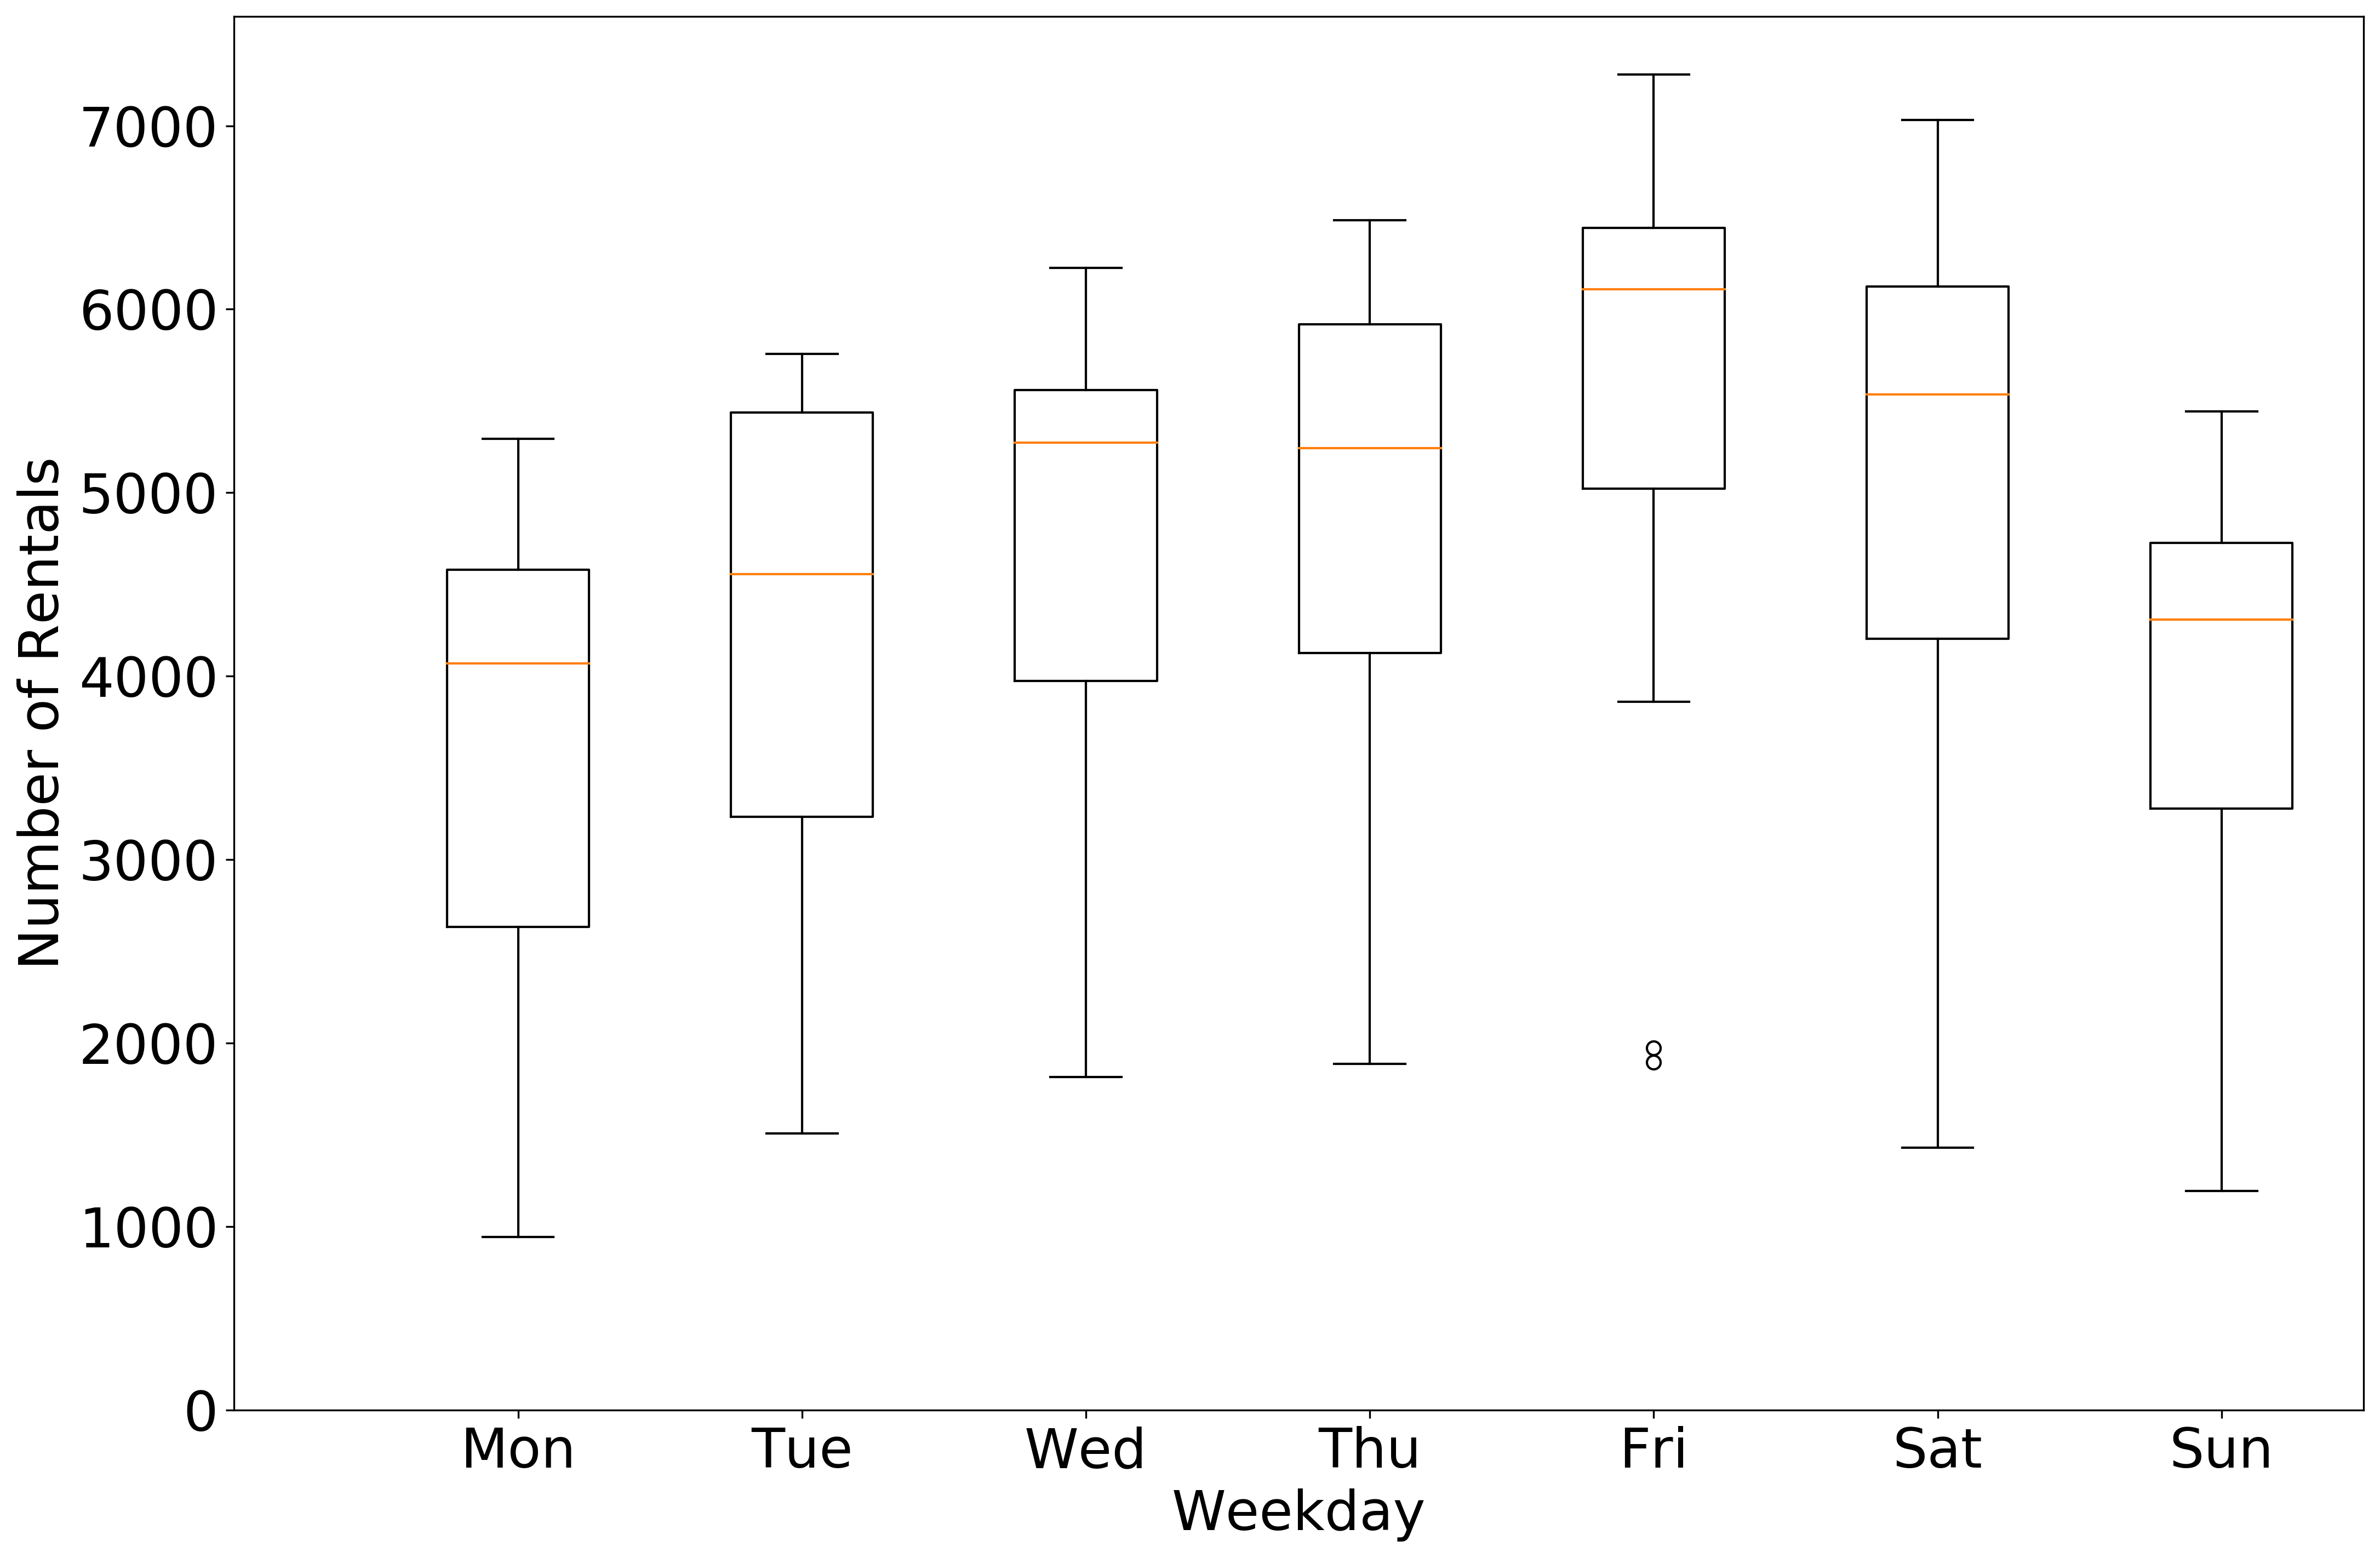

In [19]:
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams.update(font_params)

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pos = [i + 1 for i, _ in enumerate(weekdays)]

# the histogram of the data
fig, ax = plt.subplots()
ax.boxplot(weekly_data, notch=0, vert=1, whis=1.5)
ax.set_xlabel('Weekday')
ax.set_ylabel('Number of Rentals')
ax.set_xlim(left = 0)
ax.set_ylim(bottom = 0)
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
plt.xticks(pos, weekdays)

# Save chart.
plt.savefig('charts/AverageBookingsWeekday.pdf')

plt.tight_layout()
plt.show()

## Average Number of Bookings per Hour of the Day

In [20]:
hourly_data = [[] for _ in range(24)]
for name, group in df.groupby(pd.Grouper(key='date',freq='D')):
    if len(group) > 0:
        for n, g in group.groupby('hourofday'):
            hourly_data[n].append(len(g))

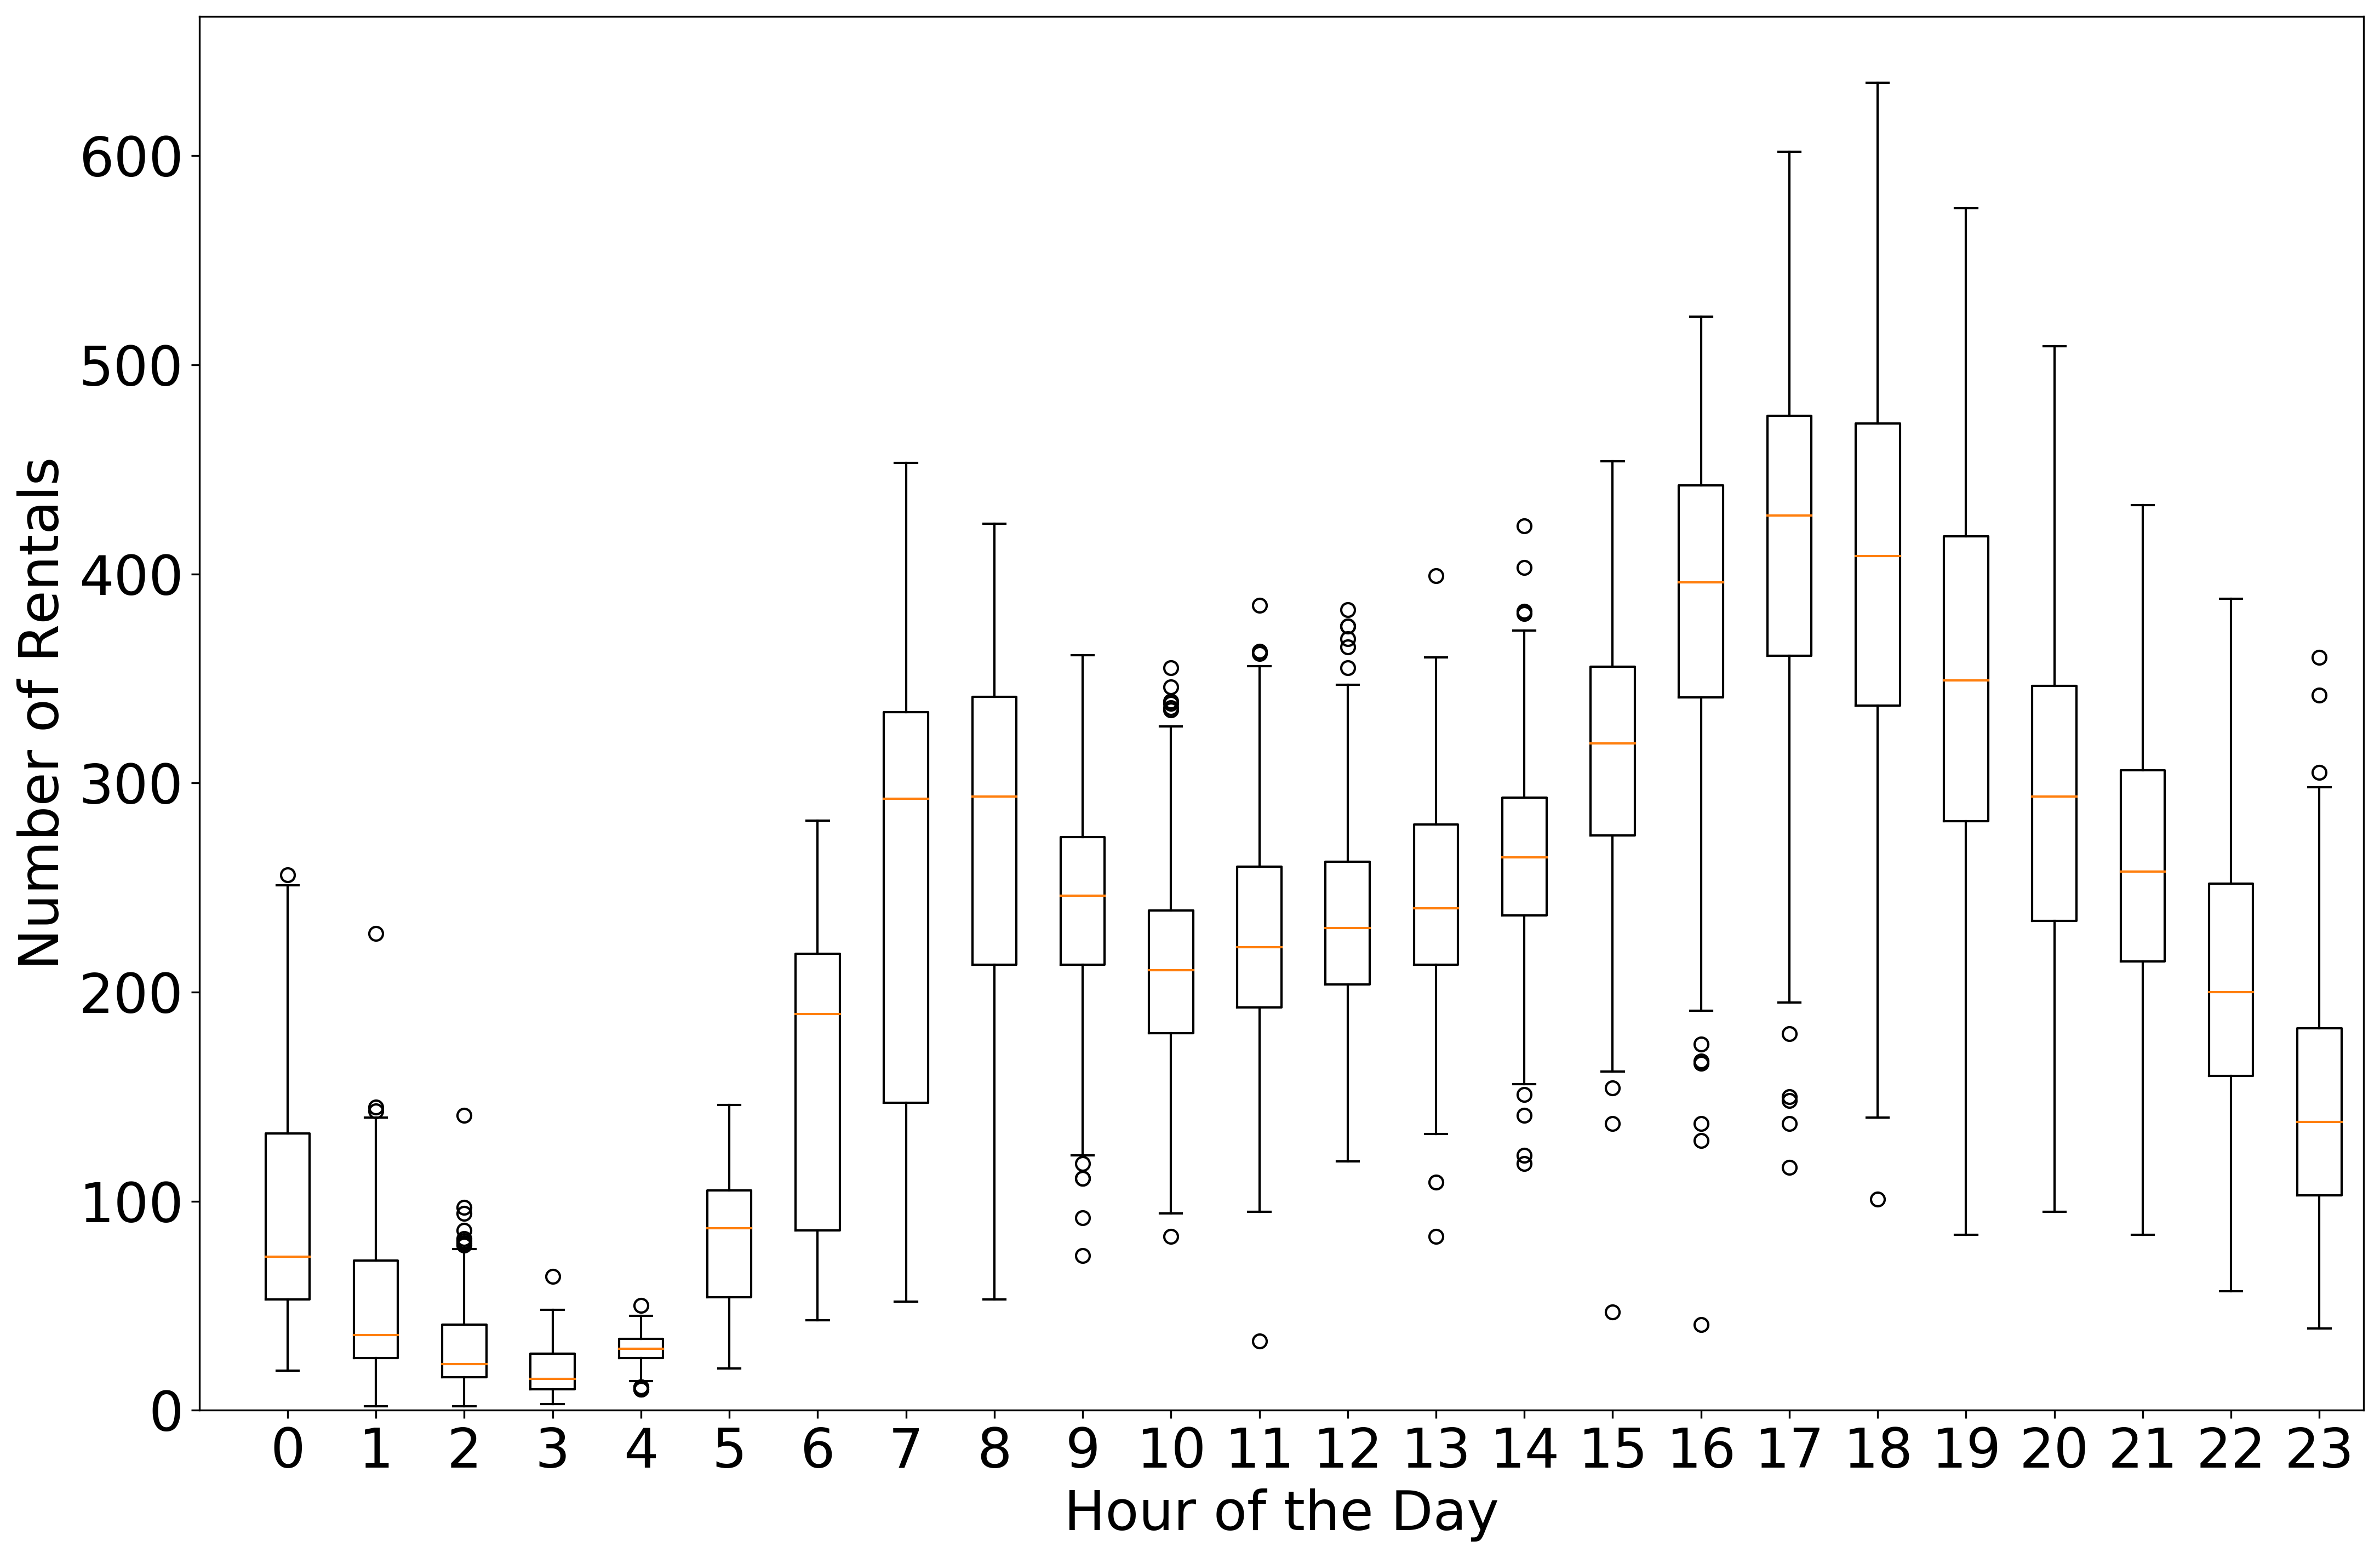

In [21]:
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams.update(font_params)

# the histogram of the data
fig, ax = plt.subplots()
ax.boxplot(hourly_data, notch=0, vert=1, whis=1.5)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Rentals')
ax.set_xlim(left = 0)
ax.set_ylim(bottom = 0)
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
plt.xticks([i + 1 for i in list(range(24))], list(range(24)))

# Save chart.
plt.savefig('charts/AverageBookingsHour.pdf')

plt.tight_layout()
plt.show()

## Average Number of Bookings per Period of the Day

In [22]:
periodic_data = [[] for _ in range(7)]
for name, group in df.groupby(pd.Grouper(key='date',freq='D')):
    if len(group) > 0:
        for n, g in group.groupby('periodofday'):
            periodic_data[n - 1].append(len(g))

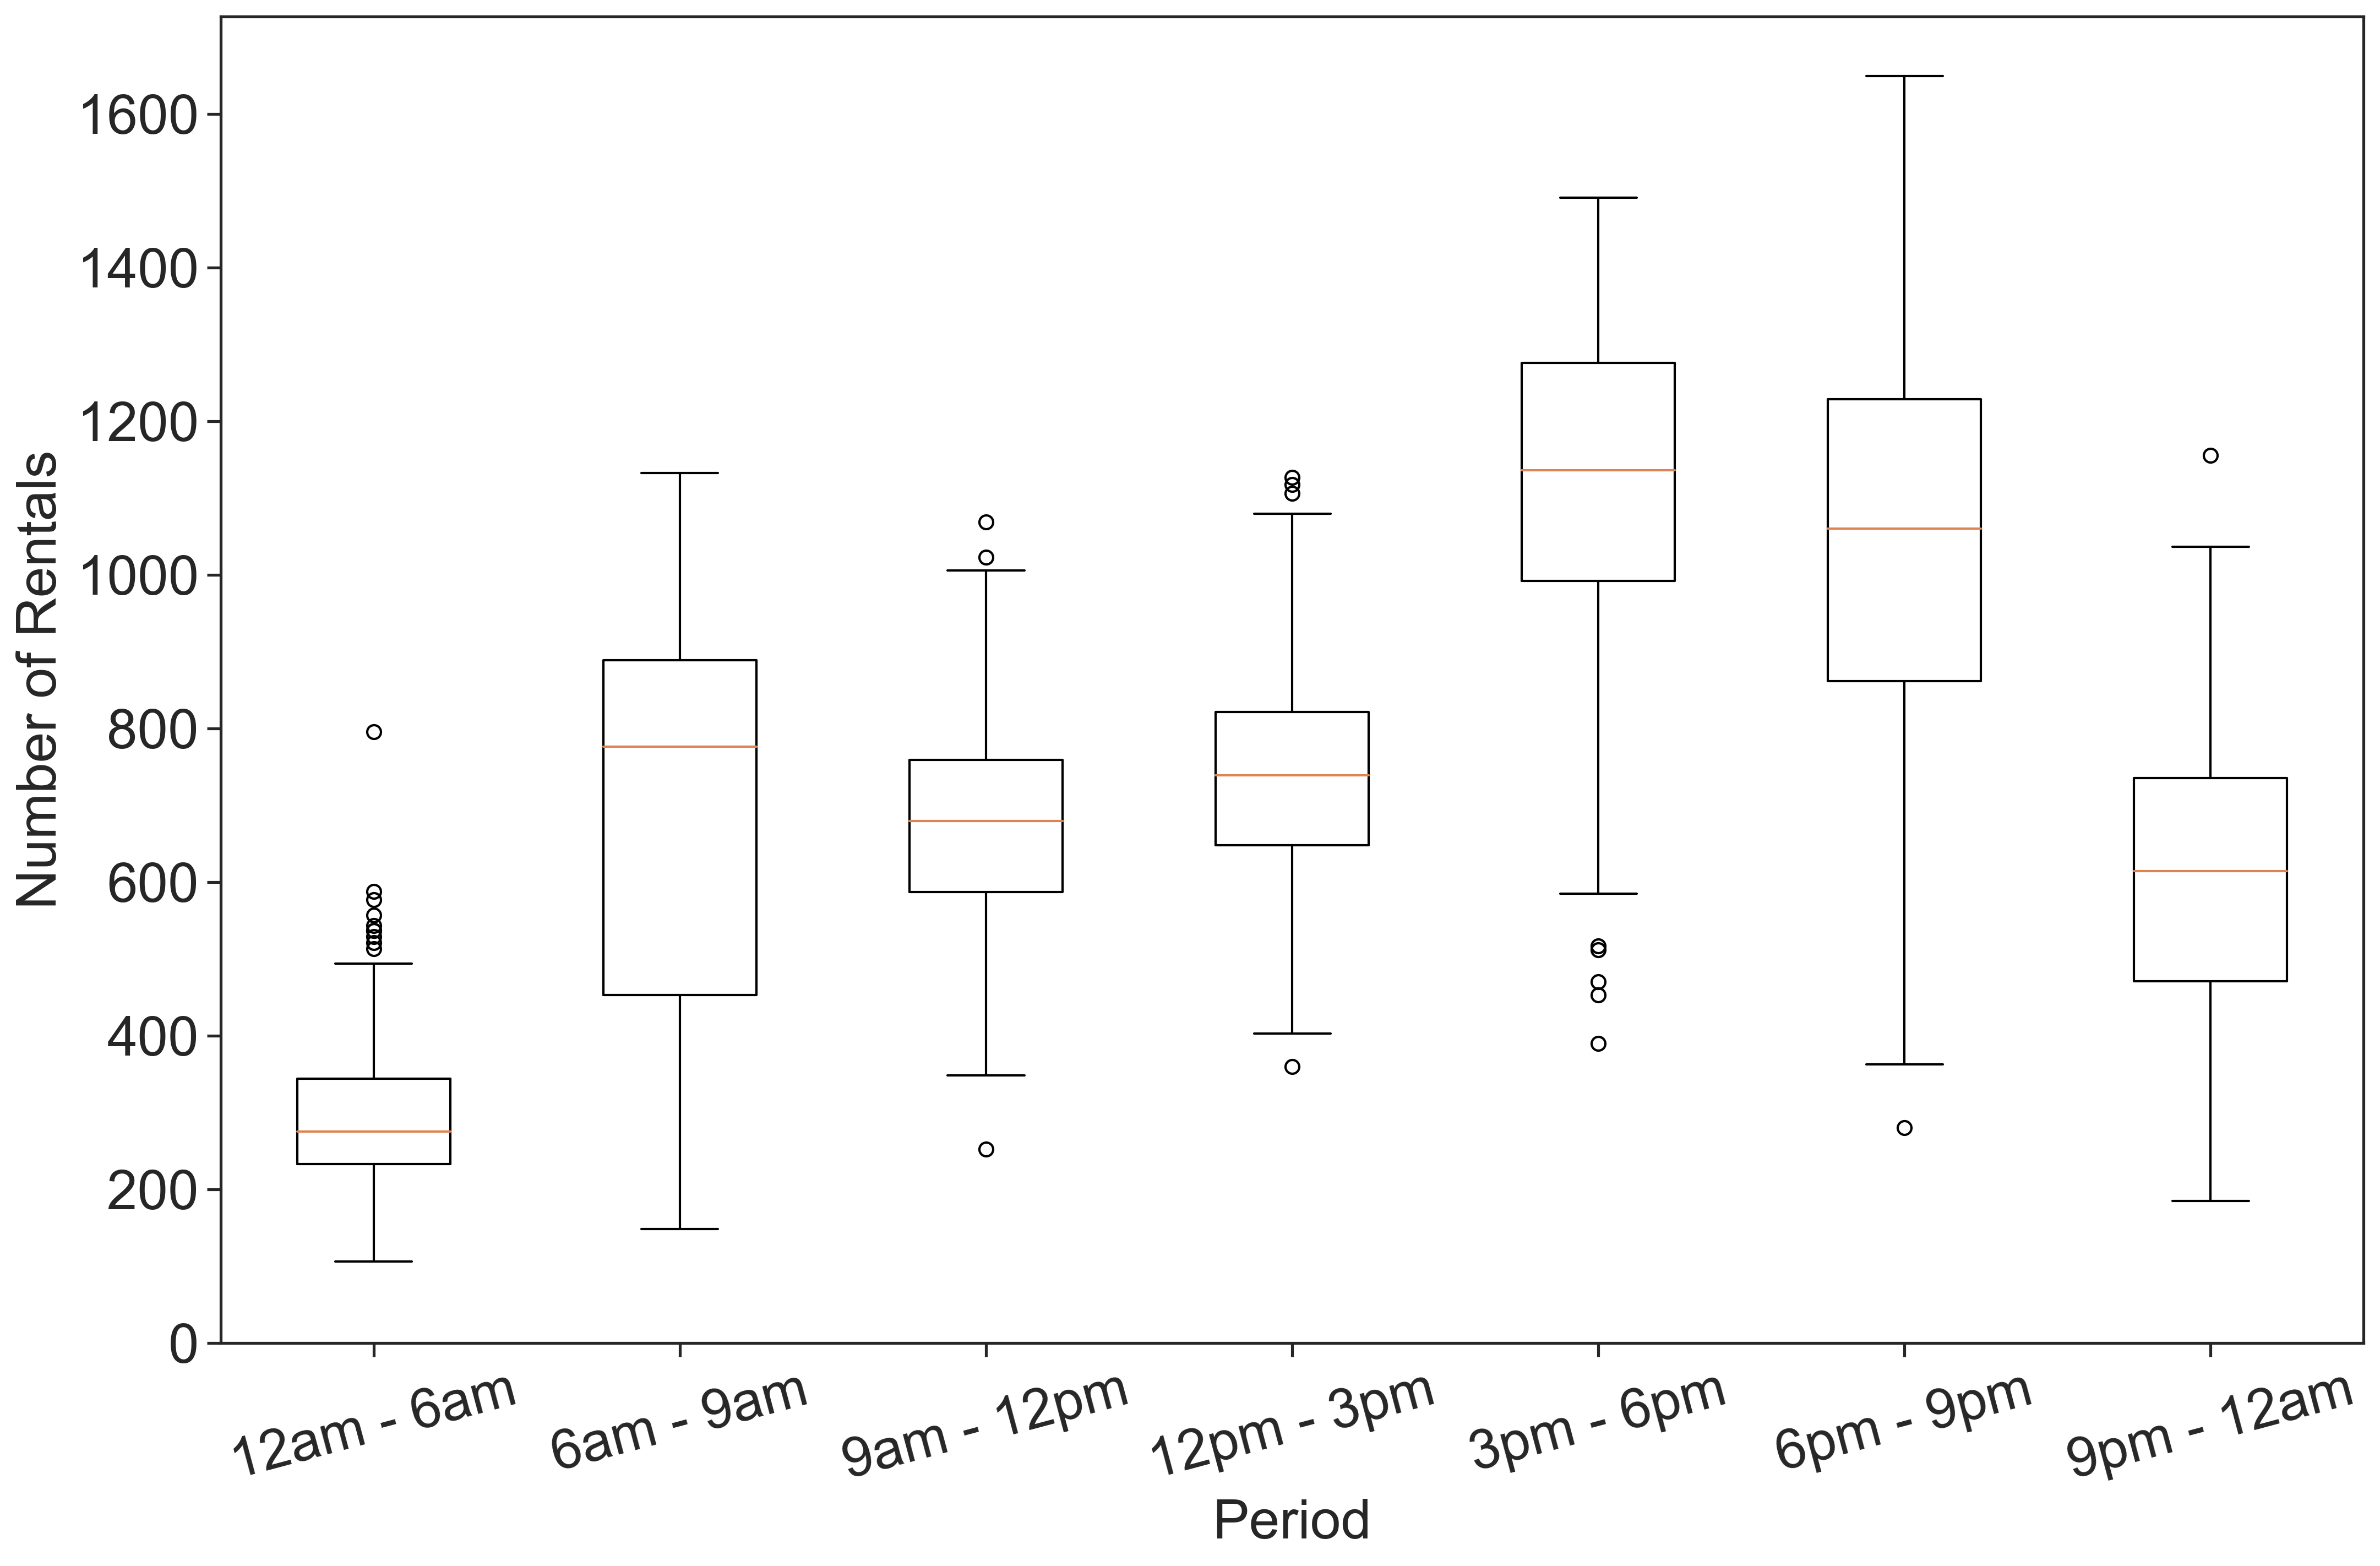

In [30]:
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams.update(font_params)

periods = ['12am - 6am', '6am - 9am', '9am - 12pm', '12pm - 3pm', '3pm - 6pm', '6pm - 9pm', '9pm - 12am']
pos = [i + 1 for i, _ in enumerate(periods)]


# the histogram of the data
fig, ax = plt.subplots()
ax.boxplot(periodic_data, notch=0, vert=1, whis=1.5)
ax.set_xlabel('Period')
ax.set_ylabel('Number of Rentals')
ax.set_ylim(bottom = 0)
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
plt.xticks(pos, periods)
plt.setp(ax.xaxis.get_ticklabels(),rotation=15)

# Save chart.
plt.savefig('charts/AverageBookingsPeriod.pdf')

plt.tight_layout()
plt.show()

## Weather Analysis

In [3]:
# Read the data and create the dataframe.
df = pd.DataFrame(pd.read_csv('data/VancouverFull.csv', encoding='utf-8', sep=","))

# Convert the 'timestamp' column to date format.
df['date'] = pd.to_datetime(df['init_date'], errors="raise")
df['datetime'] = df['date'].dt.date
df['weekday'] = df['date'].dt.weekday
df.sort_values('date', inplace=True)


In [5]:
df.head()

,id,city,distance,duration,end_lat,end_lon,end_date,end_time,end_zone,init_date,...,zone_name_init,category_init,zone_name_end,category_end,day,weekday,isweekend,hourofday,date,datetime
122,5900ec602ad853153904a163,Vancouver,5753,2908,49.27481,-123.06543,2017-01-01T12:50:39Z,1483278639,597,2017-01-01T12:02:11Z,...,RM-5B,Multi-Family Dwelling,RT-5,Two-Family Dwelling,2017-01-02T00:00:00Z,6,False,12,2017-01-01 12:02:11+00:00,2017-01-01
121,5900ec602ad8531539049fb9,Vancouver,8922,2343,49.26108,-123.24335,2017-01-01T12:41:14Z,1483278074,456,2017-01-01T12:02:11Z,...,DD,Comprehensive Development,UN,University,2017-01-02T00:00:00Z,6,False,12,2017-01-01 12:02:11+00:00,2017-01-01
120,5900ec602ad8531539049d5f,Vancouver,5429,1486,49.26900,-123.15098,2017-01-01T12:28:36Z,1483277316,546,2017-01-01T12:03:50Z,...,RS-1,One-Family Dwelling,RM-4,Multi-Family Dwelling,2017-01-02T00:00:00Z,6,False,12,2017-01-01 12:03:50+00:00,2017-01-01
119,5900ec602ad8531539049cee,Vancouver,1176,1342,49.26310,-123.07033,2017-01-01T12:26:12Z,1483277172,520,2017-01-01T12:03:50Z,...,RM-4,Multi-Family Dwelling,C-3A,Commercial,2017-01-02T00:00:00Z,6,False,12,2017-01-01 12:03:50+00:00,2017-01-01
118,5900ec602ad8531539049e91,Vancouver,1570,1714,49.27087,-123.15551,2017-01-01T12:34:55Z,1483277695,545,2017-01-01T12:06:21Z,...,RT-8,Two-Family Dwelling,C-2B,Commercial,2017-01-02T00:00:00Z,6,False,12,2017-01-01 12:06:21+00:00,2017-01-01


### Map from Weather IDs to Weather Types

In [38]:
df_unique_weather_types = df[['weather_main_id', 'weather_main']]

In [39]:
df_unique_weather_types.head()

,weather_main_id,weather_main
122,3,Clear
121,3,Clear
120,3,Clear
119,3,Clear
118,3,Clear


In [44]:
unique_weather_types = set()
for _, row in df_unique_weather_types.iterrows():
    unique_weather_types.add((row['weather_main'], row['weather_main_id']))

print(unique_weather_types)

{('Fog,Haze,Mist,Smoke', 43), ('Fog,Rain,Snow', 26), ('Rain,Rain', 35), ('Clear,Clear', 34), ('Fog,Haze', 32), ('Snow', 11), ('Haze,Rain', 20), ('Clouds', 4), ('Thunderstorm', 33), ('Haze,Snow', 30), ('Fog,Rain', 14), ('Fog,Mist,Rain', 8), ('Fog,Snow', 15), ('Fog,Mist,Rain,Snow', 16), ('Drizzle,Fog,Mist,Rain', 25), ('Drizzle,Mist,Rain', 23), ('Drizzle,Mist,Snow', 27), ('Drizzle,Fog', 17), ('Clouds,Clouds', 29), ('Mist,Rain,Snow', 1), ('Drizzle,Mist', 28), ('Clear', 3), ('Fog,Mist', 6), ('Mist', 5), ('Fog', 7), ('Mist,Rain,Thunderstorm', 46), ('Mist,Smoke', 38), ('Fog,Smoke', 40), ('Haze,Mist,Smoke', 39), ('Fog,Mist,Snow', 19), ('Haze,Mist,Rain', 37), ('Rain,Snow', 2), ('Rain,Smoke', 44), ('Rain,Thunderstorm', 22), ('Mist,Rain', 13), ('Drizzle', 18), ('Mist,Snow', 0), ('Drizzle,Rain', 31), ('Ash,Haze,Smoke', 42), ('Haze,Smoke', 36), ('Drizzle,Fog,Mist', 24), ('Haze,Rain,Smoke', 45), ('Rain', 10), ('Smoke', 9), ('Drizzle,Mist,Rain,Snow', 21), ('Haze', 12), ('Fog,Mist,Smoke', 41)}


In [46]:
for weather_id, weather_type in unique_weather_types:
    print(weather_id, weather_type)

Fog,Haze,Mist,Smoke 43
Fog,Rain,Snow 26
Rain,Rain 35
Clear,Clear 34
Fog,Haze 32
Snow 11
Haze,Rain 20
Clouds 4
Thunderstorm 33
Haze,Snow 30
Fog,Rain 14
Fog,Mist,Rain 8
Fog,Snow 15
Fog,Mist,Rain,Snow 16
Drizzle,Fog,Mist,Rain 25
Drizzle,Mist,Rain 23
Drizzle,Mist,Snow 27
Drizzle,Fog 17
Clouds,Clouds 29
Mist,Rain,Snow 1
Drizzle,Mist 28
Clear 3
Fog,Mist 6
Mist 5
Fog 7
Mist,Rain,Thunderstorm 46
Mist,Smoke 38
Fog,Smoke 40
Haze,Mist,Smoke 39
Fog,Mist,Snow 19
Haze,Mist,Rain 37
Rain,Snow 2
Rain,Smoke 44
Rain,Thunderstorm 22
Mist,Rain 13
Drizzle 18
Mist,Snow 0
Drizzle,Rain 31
Ash,Haze,Smoke 42
Haze,Smoke 36
Drizzle,Fog,Mist 24
Haze,Rain,Smoke 45
Rain 10
Smoke 9
Drizzle,Mist,Rain,Snow 21
Haze 12
Fog,Mist,Smoke 41


In [18]:
def get_period(hour):
    if hour >= 0 and hour < 6:
        return 1
    if hour > 6 and hour <= 9:
        return 2
    if hour > 9 and hour <= 12:
        return 3
    if hour > 12 and hour <= 15:
        return 4
    if hour > 15 and hour <= 18:
        return 5
    if hour > 18 and hour <= 21:
        return 6
    return 7

### Weather per Period of the Day

In [27]:
start_date = '2017-09-01'
end_date = '2017-09-29'

mask = (df['date'] > start_date) & (df['date'] <= end_date)
df_weather = df.loc[mask]
df_weather['datetime'] = df_weather['date'].dt.day
df_weather['periodofday'] = [get_period(int(p)) for p in df_weather['date'].dt.hour.values]
df_weather = df_weather[['periodofday','weather_main']]
df_weather.head()

/Users/douglas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/douglas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,periodofday,weather_main
928997,1,Clear
928996,1,Clear
928995,1,Clear
928994,1,Clear
928993,1,Clear


In [36]:
import matplotlib
font_params = {
            'font.size' : 24,
            'axes.labelsize': 24,
            'xtick.labelsize': 24,
            'ytick.labelsize': 24,
            'legend.fontsize': 24,
            'figure.dpi': 300,
            'figure.figsize': (15, 10)
            }

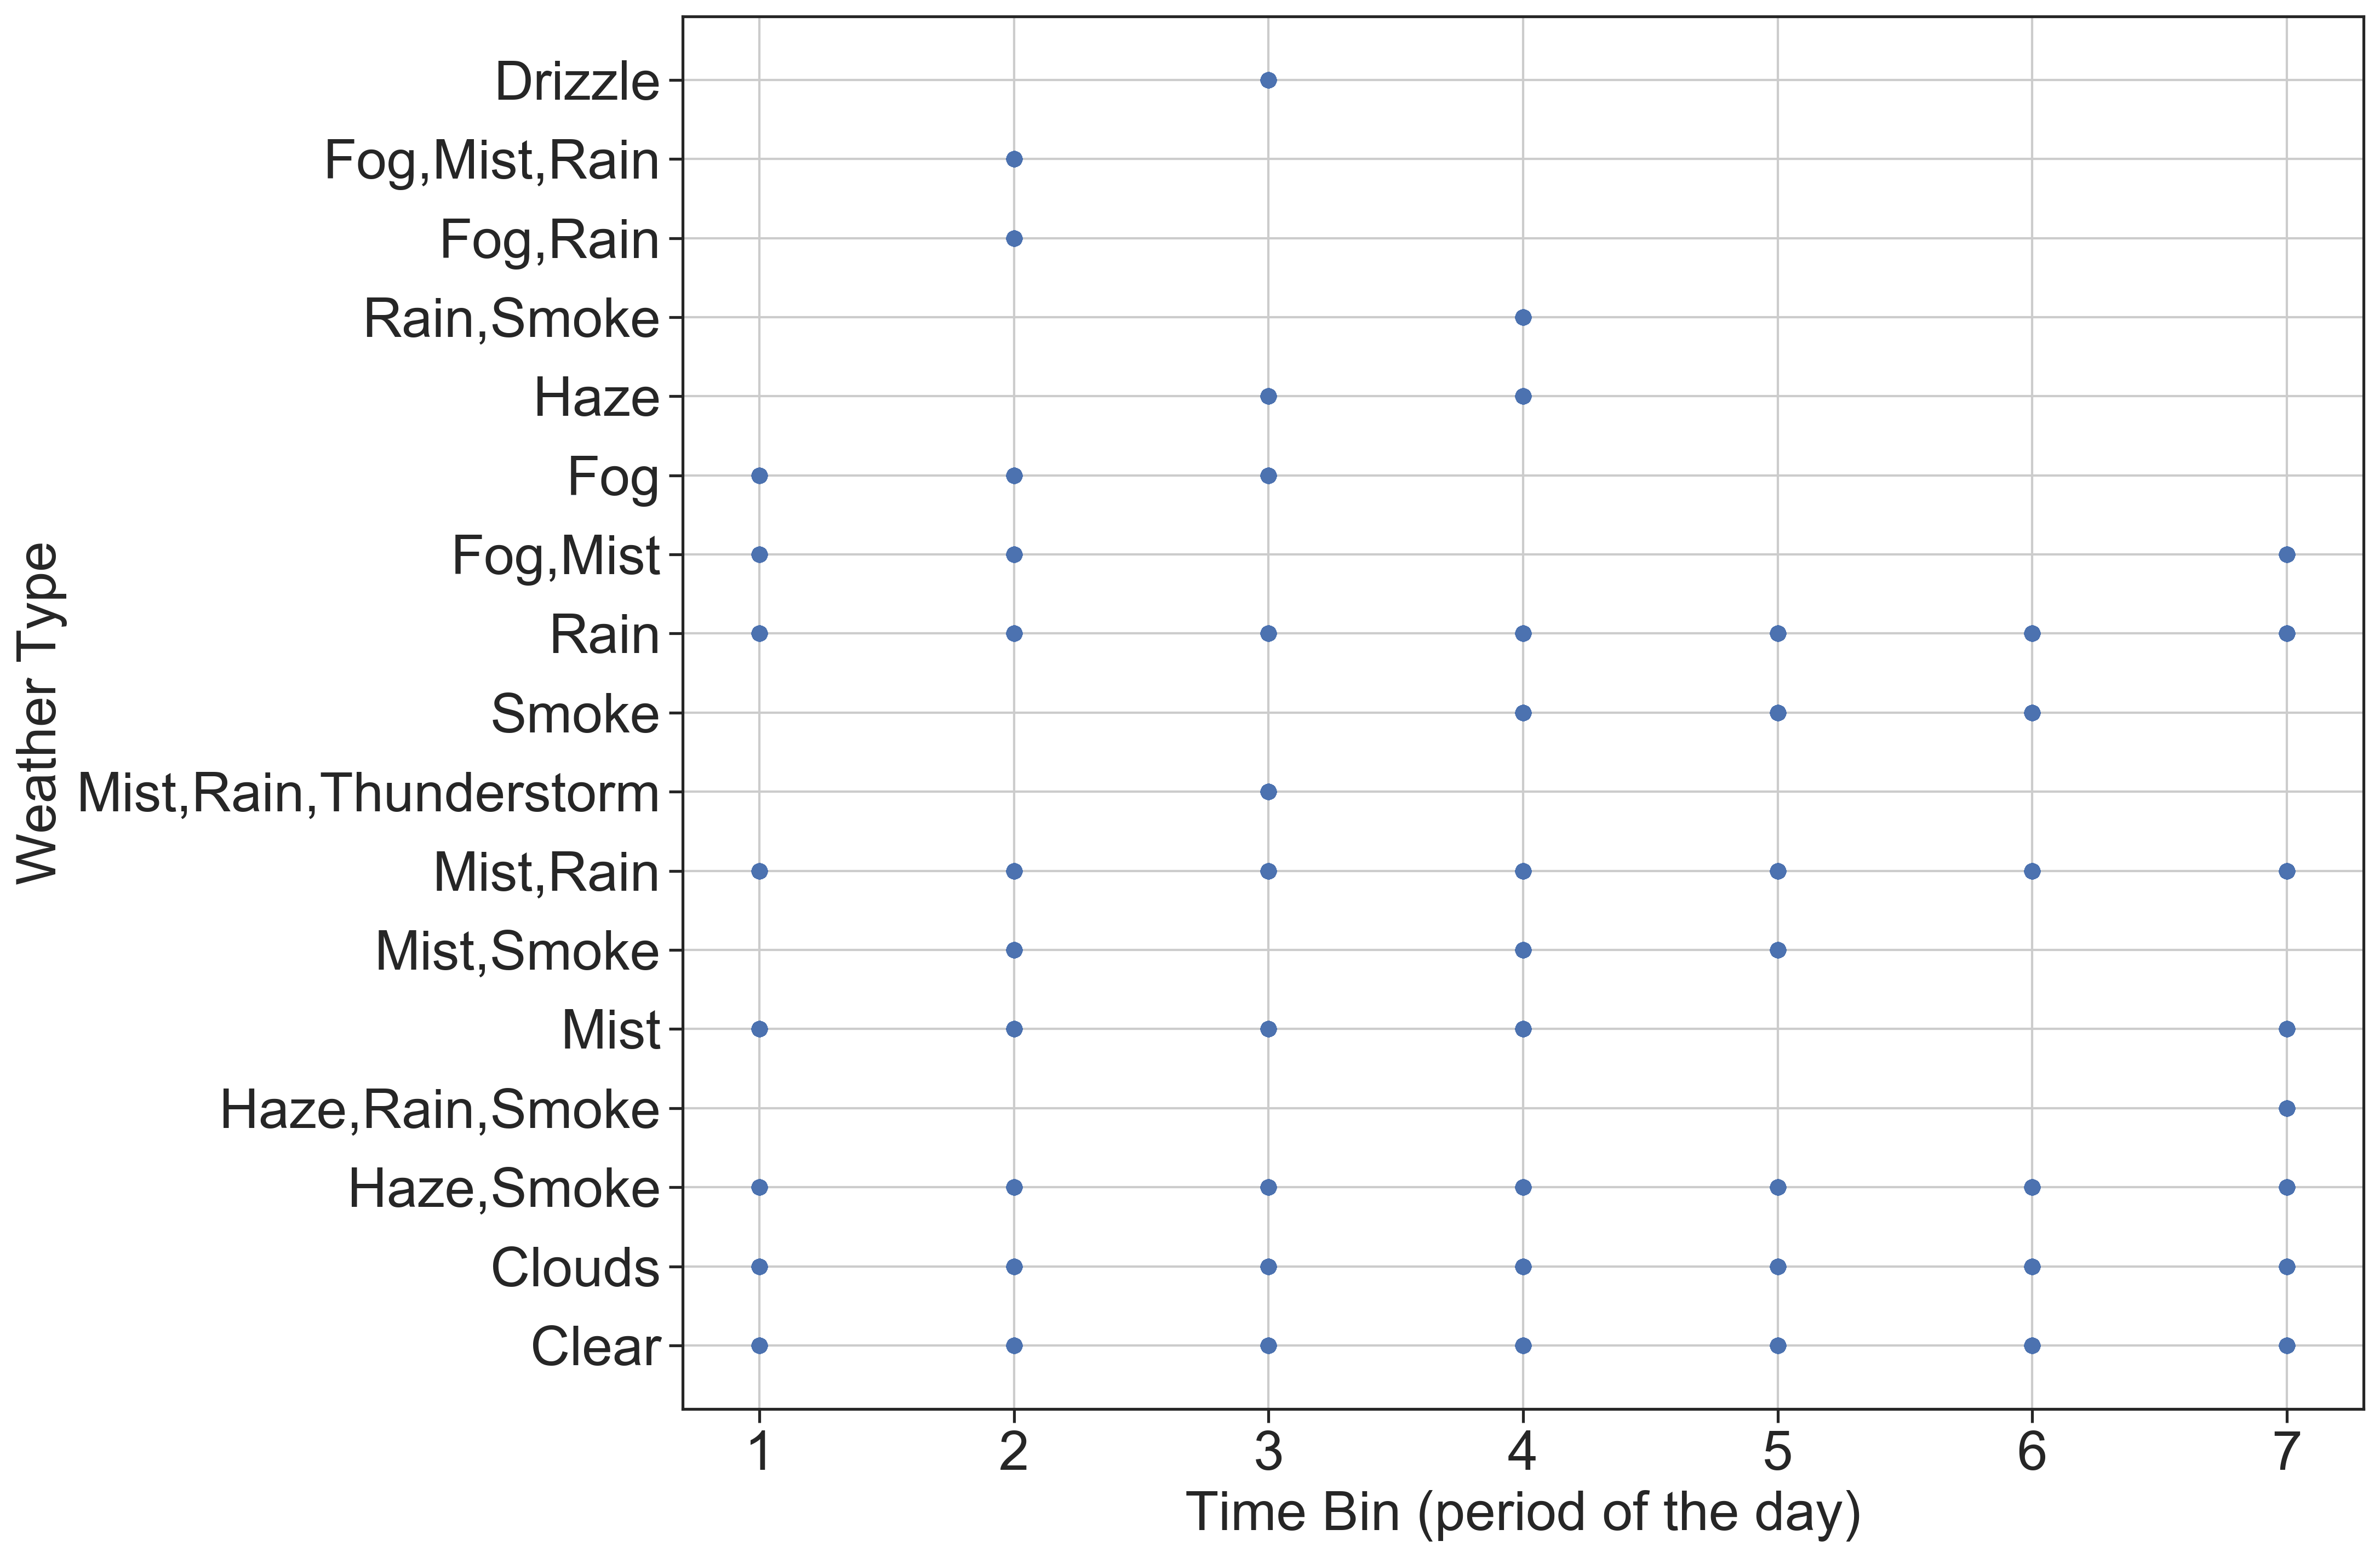

In [48]:
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams.update(font_params)

fig, ax = plt.subplots()
ax.scatter(df_weather['periodofday'], df_weather['weather_main'])
ax.set_xlabel('Time Bin (period of the day)')
ax.set_ylabel('Weather Type')
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')

plt.grid()
plt.tight_layout()

# Save chart.
plt.savefig('charts/WeatherPeriod.pdf', bbox_inches='tight')

plt.show()